In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import datetime
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.options.display.max_columns=60
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator


Creating 166 batches with 512 shuffles pictures. Shuffel is done for whole set of train pictures.

Augmentacja tylko trenigu

EfficentNet - zostajemy

https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
keras.iokeras.io

https://albumentations.ai/

GAN dostrajanie stylu

IoU - dla nas się nie sprawdzi tylko zdjęcia ptaków

Warstwy ilosc nueronów rosnie/maleje

Ile i jakich agumtancji do jakiej ilośc zdjęci dążymy i czy muszą być równomiernie rozłożone?

Ilość neroów ukrytej do ilosc wejsc/wyjsc?

525 klas i na poziomie apliacji przekazana informracja o statusie.

Metryka porawność rozpoznawani prawidłowego do wszystkich klas i fałszywie pozytwyne będą mieć większą wartość w celu ochrony ptaka.

Gdzie można wykorzystać aby zapilkować gotowy model.


## Importing two data sets:

+ df_status is data from ICUN with information about status protection of bird.
+ df_lp is data with information about images path,which set it is (train,valid,test)

##### Join will be done base on scientiffic name because it is unique for species and can be used to join both data frames.

In [2]:
df_status = pd.read_csv(r"C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\IUCN\assessments.csv")

In [3]:
df_lp = pd.read_csv(r"C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\birds.csv")

In [4]:
df_lp.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [5]:
df_status.head()

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,threats,population,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,84694321,22679393,Polyplectron schleiermacheri,Endangered,C2a(i),2016,2016-10-01 00:00:00 UTC,3.1,English,This elusive species's status is difficult to ...,Its ecological needs are poorly understood. An...,"In central Kalimantan, habitat loss, degradati...","The population is estimated to number 1,000-2,...",Decreasing,<em>Polyplectron schleiermacheri</em> is endem...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Indomalayan,NaN,False,False,Global
1,89641304,22720960,Emberiza rustica,Vulnerable,A2abcd+3bcd+4abcd,2016,2016-10-01 00:00:00 UTC,3.1,English,This species has been uplisted to Vulnerable a...,The species breeds in swampy lowland spruce (<...,The numbers of this species have declined in t...,"The European population is estimated at 681,00...",Decreasing,This bunting breeds across northern latitudes ...,NaN,Terrestrial|Freshwater (=Inland waters),<strong>Conservation and research actions unde...,Indomalayan|Nearctic|Palearctic,NaN,False,False,Global
2,90341807,22728245,Chlamydotis undulata,Vulnerable,A2cd+3cd+4cd,2016,2016-10-01 00:00:00 UTC,3.1,English,This recently split species is listed as Vulne...,It inhabits sandy and stony semi-desert and is...,"The principal threat is from hunting, which ha...","In the mid-1990s, this species's population wa...",Decreasing,This species&#160;occurs across a wide range i...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Afrotropical|Palearctic,NaN,False,False,Global
3,92761019,22678194,Crypturellus kerriae,Vulnerable,"B1ab(i,ii,iii,v);C2a(i)",2016,2016-10-01 00:00:00 UTC,3.1,English,This species is Vulnerable because it is known...,It occurs in humid primary forest. The known s...,Vast areas of seemingly suitable habitat remai...,"The population is estimated to number 2,500-9,...",Decreasing,<em>Crypturellus kerriae</em> is a poorly-know...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Neotropical,NaN,False,False,Global
4,92761578,22678217,Crypturellus noctivagus,Near Threatened,A2cd+3cd+4cd,2016,2016-10-01 00:00:00 UTC,3.1,English,This species is classified as Near Threatened ...,"It occurs in caatinga and Atlantic forest, par...",It suffers from widespread and continuing habi...,The global population size has not been quanti...,Decreasing,<em>Crypterellus noctivagus</em> is rare to lo...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Neotropical,NaN,False,False,Global


In [6]:
## adjusting name of columns to scientificName for unifying
df_lp = df_lp.rename(columns={'scientific name' : 'scientificName'})
df_lp['scientificName'] = df_lp['scientificName'].apply(lambda  x : x.lower())
df_status['scientificName'] = df_status['scientificName'].apply(lambda  x : x.lower())

In [7]:
df_status = df_status.set_index(['scientificName'])

In [8]:
df = df_lp.join(df_status,on='scientificName')

In [9]:
df_train = df[df['data set'] == 'train'].copy()
df_test = df[df['data set'] == 'test'].copy()
df_valid = df[df['data set'] == 'valid'].copy()

In [10]:
df_train


,class id,filepaths,labels,data set,scientificName,assessmentId,internalTaxonId,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,threats,population,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84630,524.0,train/BLACK BREASTED PUFFBIRD/151.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84631,524.0,train/BLACK BREASTED PUFFBIRD/152.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84632,524.0,train/BLACK BREASTED PUFFBIRD/153.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84633,524.0,train/BLACK BREASTED PUFFBIRD/146.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# droping unwated columns
list_col = list(df.iloc[:,8:].columns) + ['assessmentId','internalTaxonId']
df = df.drop(columns=list_col)

In [12]:
class_names_train = df['labels'].unique()

In [13]:
class_names_train = OneHotEncoder().fit_transform(class_names_train.reshape(-1,1)).toarray()

In [14]:
df

,class id,filepaths,labels,data set,scientificName,redlistCategory
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
...,...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN


In [15]:
# extract from directory datasets train,test,valid
train = tf.keras.utils.image_dataset_from_directory(
    directory=r'archive (1)\train',
    labels="inferred", # geting names from labels as the name of folder
    label_mode="categorical", # type of labels
    class_names=None,
    color_mode="rgb",
    image_size=(224, 224),
    batch_size=32,
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
)
test = tf.keras.utils.image_dataset_from_directory(
    
    directory=r'archive (1)\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
)
valid = tf.keras.utils.image_dataset_from_directory(
    directory=r'archive (1)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 524 classes.
Found 2625 files belonging to 525 classes.


In [16]:

def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img


In [17]:
train_datagen = ImageDataGenerator(
    #rotation_range=10,      # zakres kąta o który losowo zostanie wykonany obrót obrazów
    preprocessing_function=prep_fn,
    #width_shift_range=0.2,  # pionowe przekształcenia obrazu
    #height_shift_range=0.2, # poziome przekształcenia obrazu     
    #horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
    #fill_mode='nearest'     # strategia wypełniania nowo utworzonych pikseli, któe mogą powstać w wyniku przekształceń
)
# przeskalowujemy wszystkie obrazy o współczynnik 1/255 - zamiana na wwartosc od -1 do 1
valid_datagen = ImageDataGenerator( preprocessing_function=prep_fn)
train_generator = train_datagen.flow_from_directory(directory=r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\train',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(directory=r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\valid',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

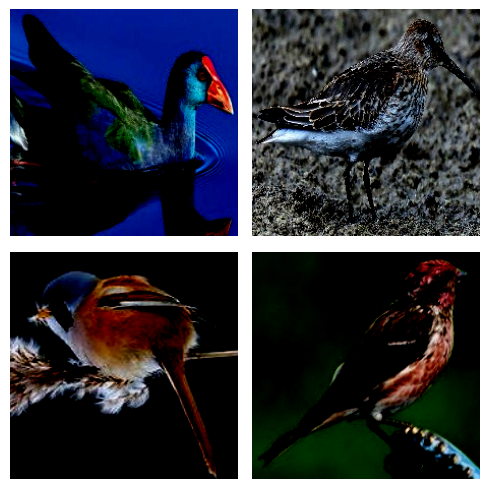

In [18]:
def display_augmented_images(generator):
    plt.figure(figsize=(5, 5))
    for i in range(4):
        augmented_images = next(generator)
        for j in range(len(augmented_images[0])):
            plt.subplot(2,2, i + 1)
            plt.imshow(augmented_images[0][j])
            plt.axis('off')
    plt.tight_layout()
    plt.show()
display_augmented_images(train_generator)

Model From Gold Kaggel

In [ ]:
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

In [ ]:
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input
x = augment(inputs)

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dropout(0.45)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.45)(x)


outputs = tf.keras.layers.Dense(525, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

Epoch 1/10
2645/2645 [==============================] - 723s 268ms/step - loss: 6.1570 - accuracy: 0.0058 - val_loss: 5.8921 - val_accuracy: 0.0084
Epoch 2/10
2645/2645 [==============================] - 713s 269ms/step - loss: 6.0534 - accuracy: 0.0066 - val_loss: 5.8317 - val_accuracy: 0.0137
Epoch 3/10
2645/2645 [==============================] - 701s 265ms/step - loss: 5.9733 - accuracy: 0.0078 - val_loss: 5.7670 - val_accuracy: 0.0114
Epoch 4/10
2645/2645 [==============================] - 701s 265ms/step - loss: 5.8676 - accuracy: 0.0076 - val_loss: 5.6653 - val_accuracy: 0.0095
Epoch 5/10
2645/2645 [==============================] - 701s 265ms/step - loss: 5.8437 - accuracy: 0.0086 - val_loss: 5.6693 - val_accuracy: 0.0099
Epoch 6/10
2645/2645 [==============================] - 700s 264ms/step - loss: 5.8291 - accuracy: 0.0089 - val_loss: 5.6567 - val_accuracy: 0.0114
Epoch 7/10
2645/2645 [==============================] - 700s 265ms/step - loss: 5.8105 - accuracy: 0.0097 - val_

In [ ]:
log_dir = os.path.join("logs", "bird", "our-cnn", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train,
  batch_size = 32,
  validation_data=valid,
  epochs=10,
  callbacks=[tensorboard_callback]
)

In [ ]:
model.save('saved_model/bird.h5')

In [ ]:
new_model = tf.keras.models.load_model('saved_model/bird.h5')

In [ ]:
y_pred = new_model.predict(test)

83/83 [==============================] - 26s 250ms/step


# Create a way to extrac lables

In [ ]:
class_names = df.copy()
class_names = class_names[['labels','redlistCategory']].drop_duplicates()
class_names = class_names.fillna('Not in Threat')
class_names

,labels,redlistCategory
0,ABBOTTS BABBLER,Not in Threat
163,ABBOTTS BOOBY,Endangered
343,ABYSSINIAN GROUND HORNBILL,Vulnerable
522,AFRICAN CROWNED CRANE,Endangered
657,AFRICAN EMERALD CUCKOO,Not in Threat
...,...,...
83690,DUNLIN,Not in Threat
83880,SNOWY SHEATHBILL,Not in Threat
84067,KNOB BILLED DUCK,Not in Threat
84264,GREY HEADED CHACHALACA,Not in Threat


In [ ]:
np.save(file = 'brids_class', arr =class_names,allow_pickle=True)

In [ ]:
np.load('brids_class.npy',allow_pickle=True)

array([['ABBOTTS BABBLER', 'Not in Threat'],
       ['ABBOTTS BOOBY', 'Endangered'],
       ['ABYSSINIAN GROUND HORNBILL', 'Vulnerable'],
       ...,
       ['KNOB BILLED DUCK', 'Not in Threat'],
       ['GREY HEADED CHACHALACA', 'Not in Threat'],
       ['BLACK BREASTED PUFFBIRD', 'Not in Threat']], dtype=object)

In [ ]:
position = np.argmax(y_pred[8]) 
class_names.iloc[position][1].title()

'Not In Threat'

In [ ]:
y_pred[8].max()

0.0045694835

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.efficientnet import preprocess_input
from keras.models import load_model

In [ ]:
image_path = os.path.join(r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\test\AMERICAN AVOCET\1.jpg')

In [ ]:
image =  load_img(image_path, target_size=(224,224))
image = img_to_array(image)
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
yhat = new_model.predict(image)
position = np.argmax(yhat) 
label = class_names[position]
value = yhat.max()
classification = '%s (%.2f%%)' % (label,value*100)

1/1 [==============================] - 0s 60ms/step


In [ ]:
classification

'NOISY FRIARBIRD (0.46%)'

In [ ]:
from sklearn.metrics import classification_report